In [156]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import ArtistAnimation, FuncAnimation

from array2gif import write_gif
from PIL import Image, ImageDraw
import numpy as np
import pandas as pd
import gc
from matplotlib import pyplot as plt
import seaborn as sns
import cv2
import rasterio
import geopandas as gpd
from rasterio.plot import show, show_hist
import rasterio
import rasterio.mask as Mask
import rasterio.features
import rasterio.warp
from rasterio.plot import show_hist
import fiona
import os
from PIL import Image


def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))



def extract_ni_from_tif(name='L1C_T53HPA_A004418_20180110T005319',
                      BASE = '/Volumes/My Passport for Mac/sentinel_2_53HPA/',
                      figsize=(20,20),
                      plot=True):
    smooth = 1e-5
    b04 = cv2.resize(rasterio.open(BASE+name+'_b02.tif').read(1), (5490,5490))
    b08 = cv2.resize(rasterio.open(BASE+name+'_b03.tif').read(1), (5490,5490))
    b12 = cv2.resize(rasterio.open(BASE+name+'_b04.tif').read(1), (5490,5490))
    
    ndvi= (b08-b04+smooth)/(b08+b04+smooth)
    nbr = (b08-b12+smooth)/(b08+b12+smooth)
    #ni = np.concatenate([ndvi, nbr],axis=-1)
    return ndvi, nbr

In [157]:
ndvi, nbr = extract_ni_from_tif(name='L1C_T53HPA_A009423_20181226T004702')

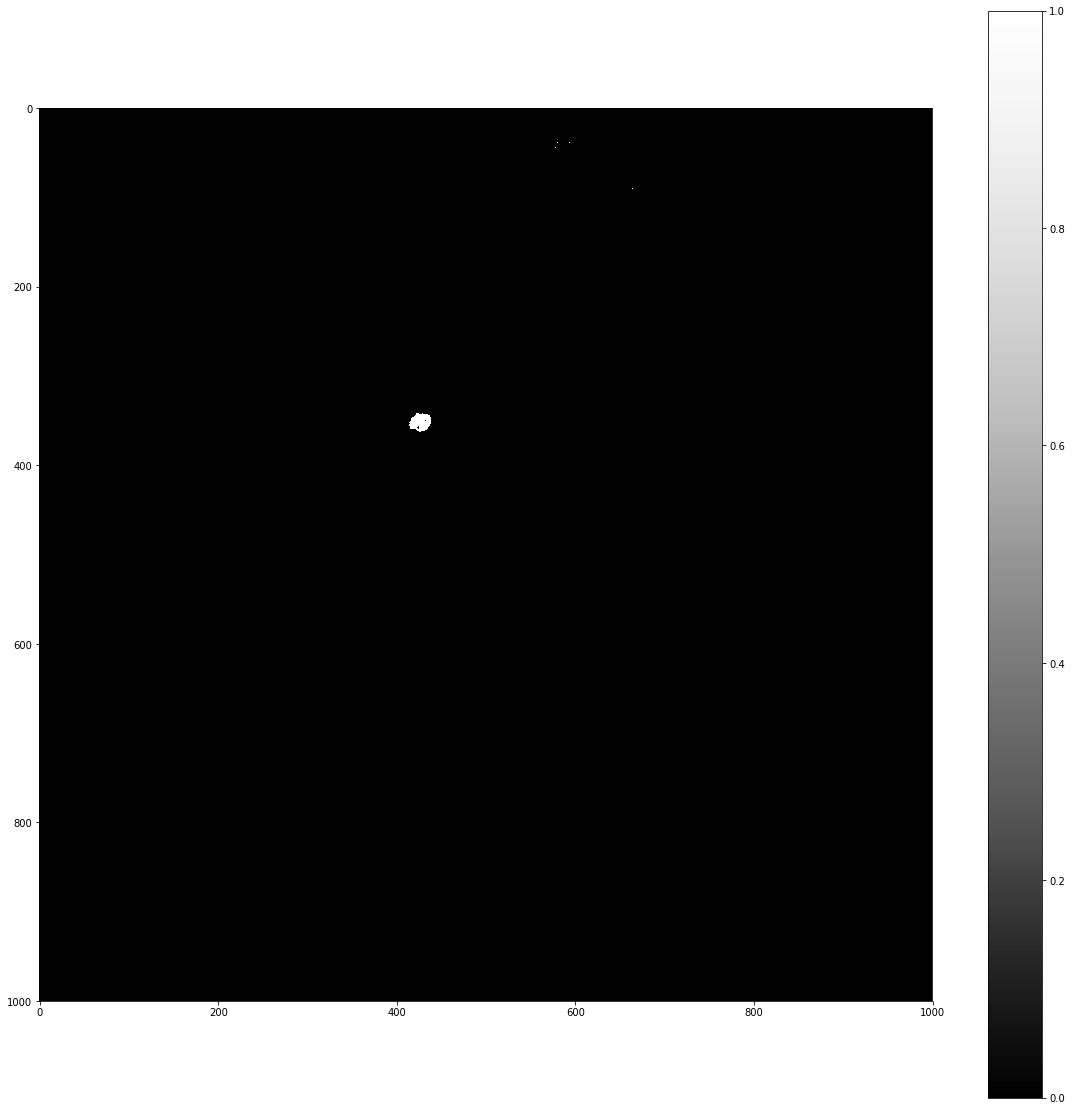

In [168]:
ndvi_thres = 56.5
plt.figure(figsize=(20,20))
plt.imshow((ndvi[3000:4000,2200:3200]>ndvi_thres).astype(int), cmap='Greys_r')
plt.colorbar()


In [171]:
np.save('water_mask_based_on_ndvi_565', water_mask)